In [93]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import password

In [4]:
# Create Engine to connect to database
dbuser = 'postgres'
dbpassword = password
dbhost = 'localhost'
dbport = '5432'
dbname= 'Assignment_09_SQL'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")
connection = engine.connect()

In [6]:
### Import table
sql_code = 'SELECT s.emp_no, t.title, s.salary FROM salaries AS s INNER JOIN employees AS e ON e.emp_no = s.emp_no INNER JOIN titles AS t ON t.title_id = e.emp_title_id'
table = pd.read_sql(sql_code, connection)
table.head(10)

,emp_no,title,salary
0,10005,Staff,78228
1,10010,Engineer,72488
2,10011,Staff,42365
3,10018,Senior Engineer,55881
4,10035,Senior Engineer,41538
5,10043,Senior Engineer,49324
6,10045,Engineer,41971
7,10058,Senior Staff,52787
8,10078,Engineer,47280
9,10081,Senior Engineer,55786


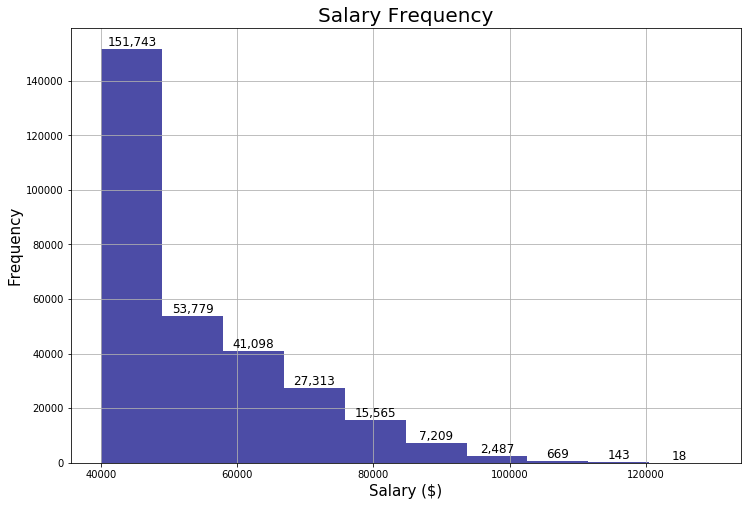

In [94]:
# ax = table.hist(column='salary', figsize=(10,8), color='navy', alpha=0.7)
salary_freq = table['salary']

ax = salary_freq.plot.hist(bins=10, color='navy', alpha=0.7, grid=True, figsize = (12,8))

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the data value and can used as the label
    label_text = f'{height:,.0f}'  # f'{height:.2f}' if you have decimal values as labels
    
    label_x = x + width / 2
    label_y = y + height + 2500
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

plt.title('Salary Frequency', fontsize=20)
plt.xlabel('Salary ($)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

histogram = os.path.join('Images','salary_frequency.png')
plt.savefig(histogram)

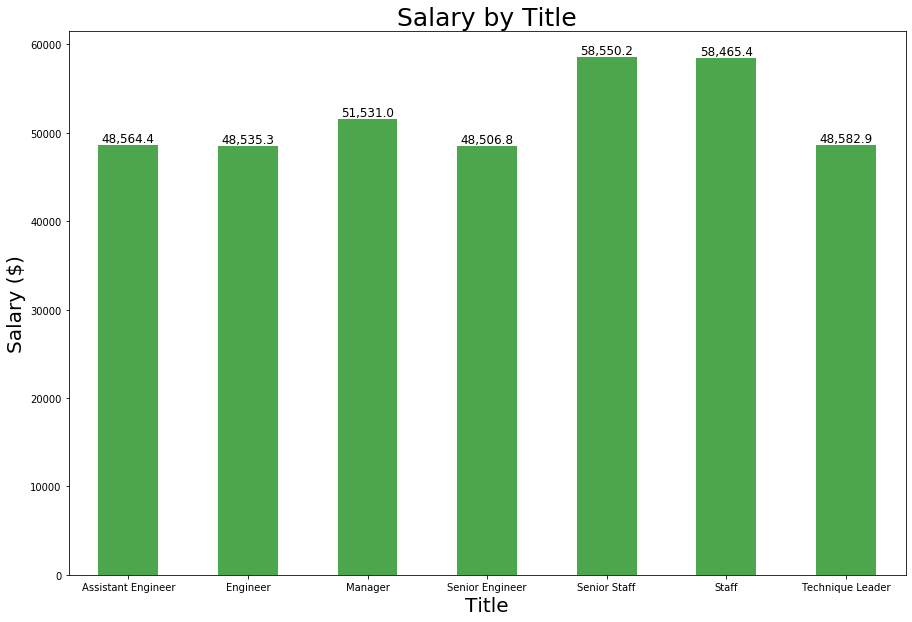

In [95]:
salaries = table.groupby(['title'])['salary'].mean()
ax = salaries.plot.bar(figsize=(15,10), color='green', alpha=.7, rot=0)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The width of the bar is the data value and can used as the label
    label_text = f'{height:,.1f}'  # f'{height:.2f}' if you have decimal values as labels
    
    label_x = x + width / 2
    label_y = y + height + 750
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

plt.title('Salary by Title', fontsize=25)
plt.xlabel('Title', fontsize=20)
plt.ylabel('Salary ($)', fontsize=20)

bar = os.path.join('Images','salary_by_title.png')
plt.savefig(bar)